In [43]:
import h5py
import glob
import numpy as np
import matplotlib.pyplot as plt

In [50]:
filenames = glob.glob('../results/mnist-noniid/*.h5')

In [51]:
def parse_filename(filename):
  filename_arr = filename.split('/')[-1][:-3].split('_')
  global_round = int(filename_arr[3][2:])
  local_step = int(filename_arr[4][2:])
  batch_size = int(filename_arr[5][2:])
  learning_rate = float(filename_arr[6][2:])
  return filename_arr[0], filename_arr[1], filename_arr[2], global_round, local_step, batch_size, learning_rate

In [52]:
result_arr = []
for filename in filenames:
	with h5py.File(filename, 'r') as f:
		dataset, _, model, global_round, local_step, batch_size, learning_rate = parse_filename(filename)
		loss = f['rs_train_loss'][:]
		acc = f['rs_test_acc'][:]
		result_arr.append([dataset, model, global_round, local_step, batch_size, learning_rate, loss, acc])

In [69]:
def plot_loss_and_acc(result_arr, dataset, model, local_step, learning_rate=0.05):
	plt.figure(figsize=(6, 5))
	plt.title(f'Loss')
	for result in result_arr:
		if result[0] != dataset or result[1] != model or result[3] != local_step or result[5] != learning_rate:
			continue
		plt.plot(result[6], label=f'Epoch: {160:<3} Local Step: {result[3]:<2} Batch Size: {result[4]:<3}')
	plt.xlim(0, 160)
	# plt.xlim(0, 150)
	plt.ylim(0, 2)
	# plt.xticks(np.arange(0, 151, 30))
	# plt.xlim(0, 100)
	plt.legend()
	plt.show()
	
	plt.figure(figsize=(6, 5))
	plt.title(f'Accuracy')
	for result in result_arr:
		if result[0] != dataset or result[1] != model or result[3] != local_step or result[5] != learning_rate:
			continue
		plt.plot(result[7], label=f'Epoch: {160:<3} Local Step: {result[3]:<2} Batch Size: {result[4]:<3}')
	plt.xlim(0, 160)
	# plt.xlim(0, 150)
	# plt.xticks(np.arange(0, 151, 30))
	# plt.xlim(0, 100)
	plt.ylim(0, 1)
	plt.legend()
	plt.show()
	

In [70]:
result_arr.sort(key=lambda x: x[4])

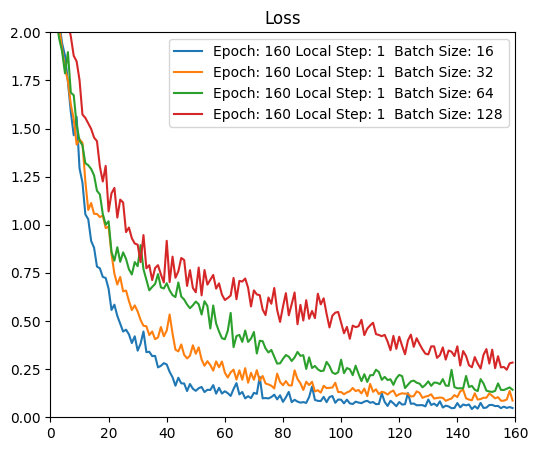

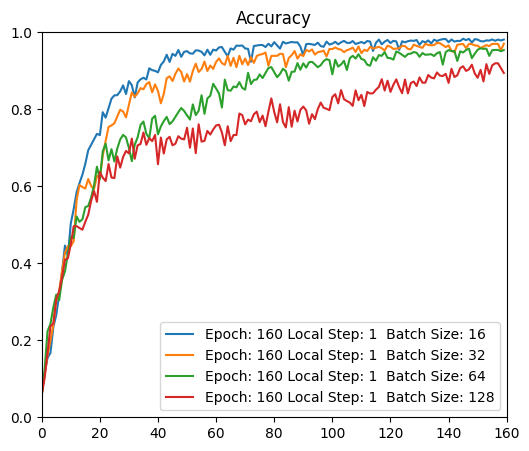

In [72]:
plot_loss_and_acc(result_arr, 'mnist', 'cnn', 1, 0.005)